
# Importação das bibliotecas e dos dados.


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

In [106]:
file_path = '/content/sample_data/gt_2015.csv'
df = pd.read_csv(file_path)

# Pré-análise dos dados

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


In [108]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [109]:
df.shape

(7384, 11)

In [110]:
df.columns
# Ambient temperature (AT), Ambient pressure (AP), Ambient humidity (AH)(%), Air filter difference pressure (AFDP), Gas turbine exhaust pressure (GTEP),
# Turbine inlet temperature (TIT), Turbine after temperature (TAT), Compressor discharge pressure (CDP), Turbine energy yield (TEY), Carbon monoxide (CO), Nitrogen oxides (NOx)

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [111]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


# Pré-Processamento dos dados

In [112]:
X = df.values

# K-MEANS - Calculando a Inércia para o método do Cotovelo e usando o Silhouette Score para descobrir o K-Ótimo

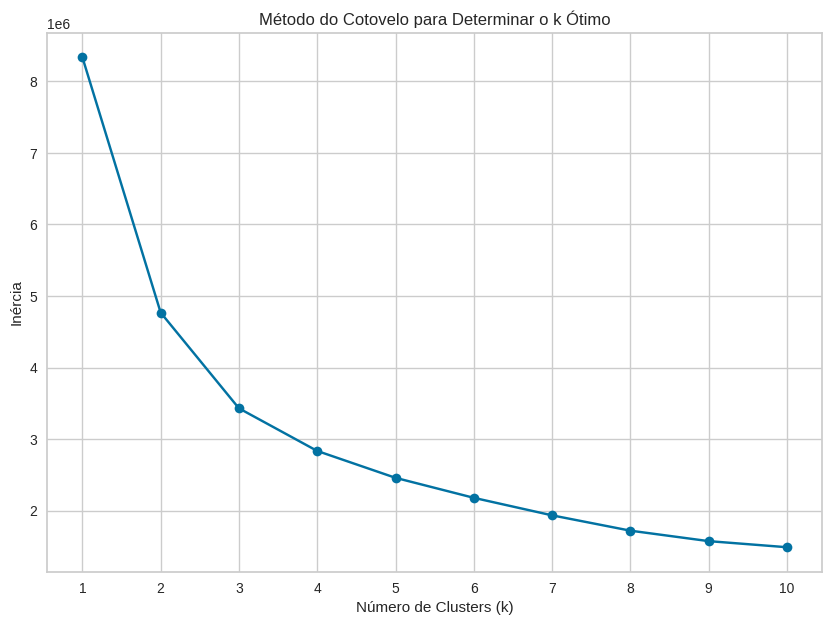

In [113]:
inertias = []
k_values = range(1, 11) # range da quantidade de clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(k_values, inertias, marker='o')
plt.title('Método do Cotovelo para Determinar o k Ótimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.show()

Utilizando dados escalonados de maneiras diferentes para tentar encontrar melhores resultados.

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler_norm = Normalizer()
X_norm = scaler_norm.fit_transform(X)
scaler_max = MinMaxScaler()
X_min_max = scaler_max.fit_transform(X)

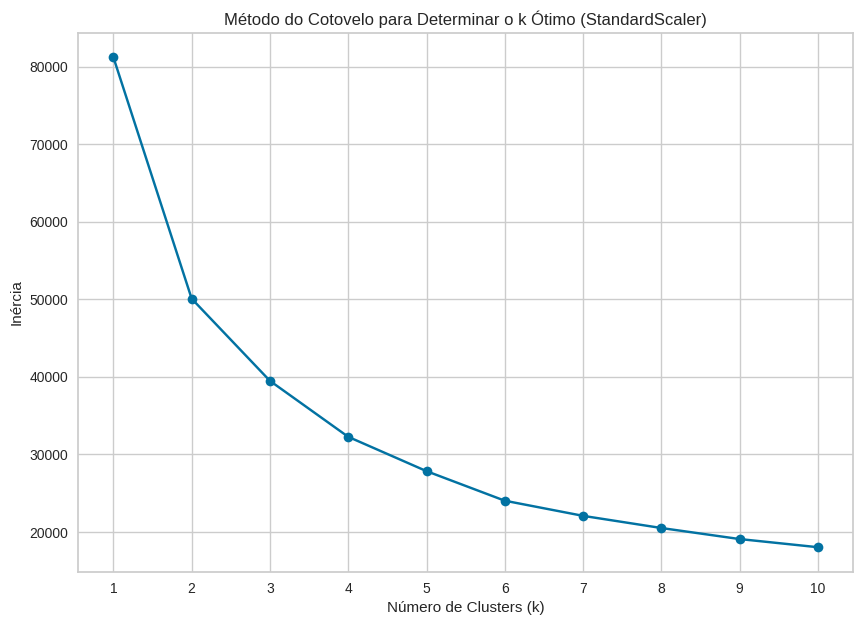

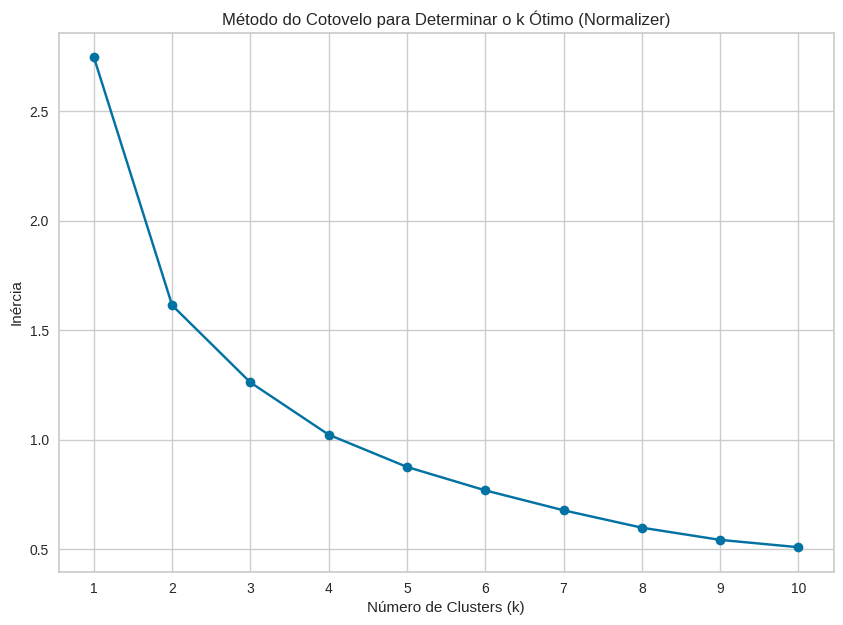

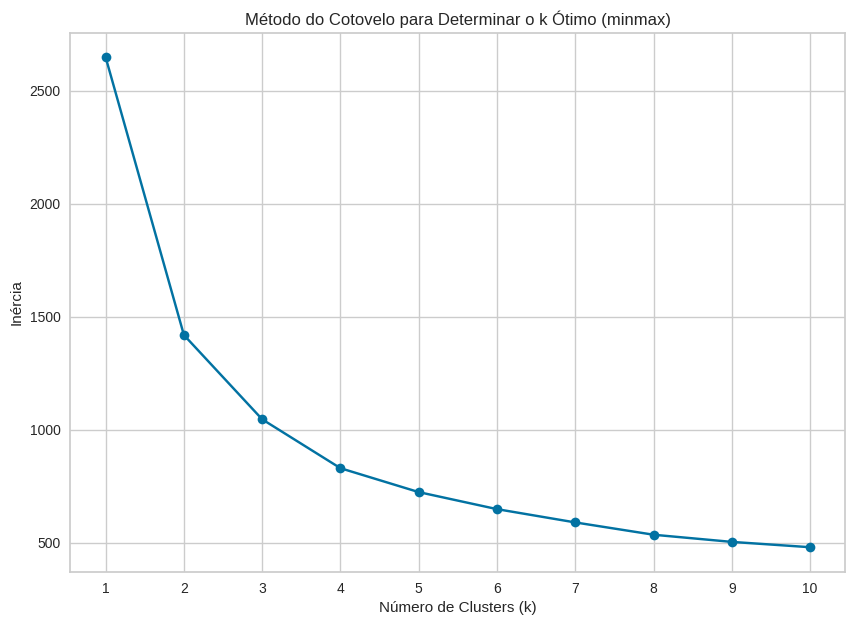

In [115]:
#Calculando a inércia usando o método do cotovelo dessa vez com os dados escalonados

inertias_scaled = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias_scaled.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(k_values, inertias_scaled, marker='o')
plt.title('Método do Cotovelo para Determinar o k Ótimo (StandardScaler)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.show()

inertiasNorm = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_norm)
    inertiasNorm.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(k_values, inertiasNorm, marker='o')
plt.title('Método do Cotovelo para Determinar o k Ótimo (Normalizer)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.show()

inertiasMinMax = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_min_max)
    inertiasMinMax.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(k_values, inertiasMinMax, marker='o')
plt.title('Método do Cotovelo para Determinar o k Ótimo (minmax)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(k_values)
plt.show()

Visualizando a variação do Silhouette Score nos dados com base no número de clusters

In [116]:
#Criando a função que vai fazer o cálculo e retornar os valores
def kmeans_sil(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init=10)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

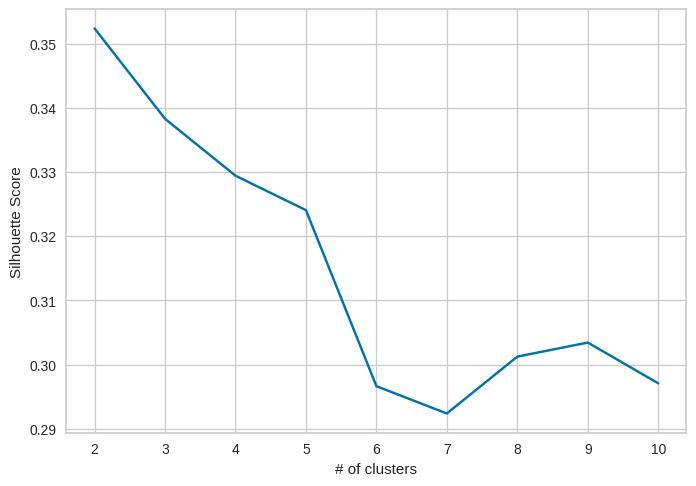

In [117]:
num_clusters = [i for i in range(2, 11)] # Range do número de clusters

#Plot dos dados não escalonados
sil_score = kmeans_sil(num_clusters, X)
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

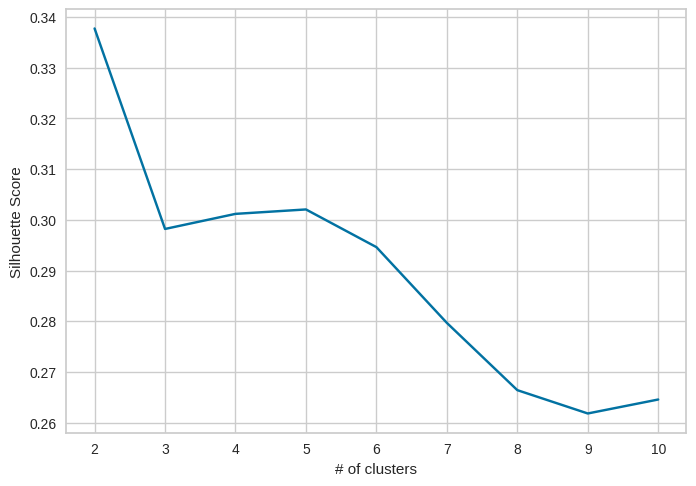

In [118]:
#Plot dos dados escalonados usando o Standard Scaler
sil_score = kmeans_sil(num_clusters, X_scaled)
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

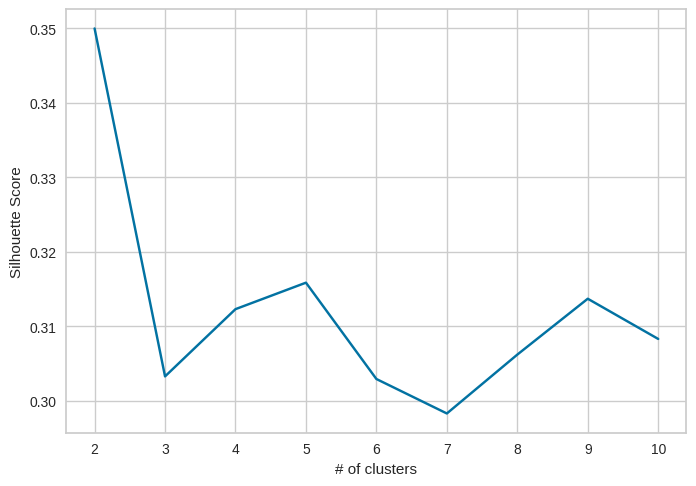

In [119]:
#Plot dos dados escalonados usando o Normalizer
sil_score = kmeans_sil(num_clusters, X_norm)
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

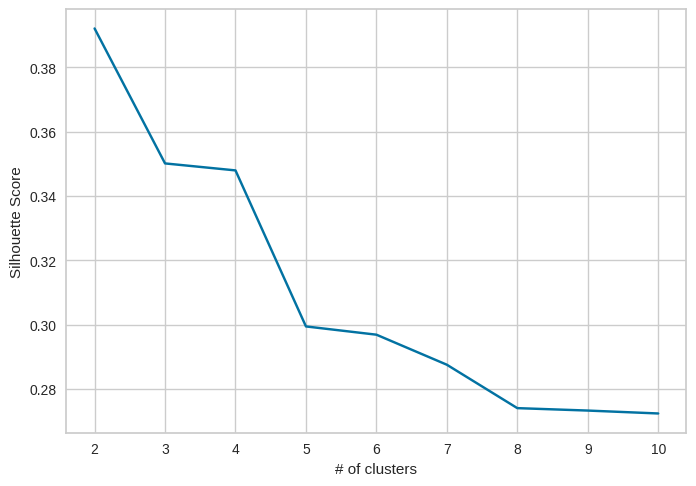

In [120]:
#Plot dos dados escalonados usando o MinMaxScaler
sil_score = kmeans_sil(num_clusters, X_min_max)
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

Após os vários testes considerei o K-Ótimo como sendo 2

In [121]:
K_otimo = 2

In [122]:
#Criando os kmeans usando os dados não escalonados e escalonados

kmeans = KMeans(n_clusters=K_otimo, random_state= 42, n_init = 10)
kmeans_lables = kmeans.fit_predict(X)

kmeansScaled = KMeans(n_clusters=K_otimo, random_state= 42, n_init = 10)
kmeans_lablesScaled = kmeansScaled.fit_predict(X_scaled)

kmeansNorm = KMeans(n_clusters=K_otimo, random_state= 42, n_init = 10)
kmeans_lablesNorm = kmeansNorm.fit_predict(X_norm)

kmeansMinMax = KMeans(n_clusters=K_otimo, random_state= 42, n_init = 10)
kmeans_lablesMinMax = kmeansMinMax.fit_predict(X_min_max)


# K-MEANS - Visualizando as silhuetas e vendo os scores finais de cada modelo

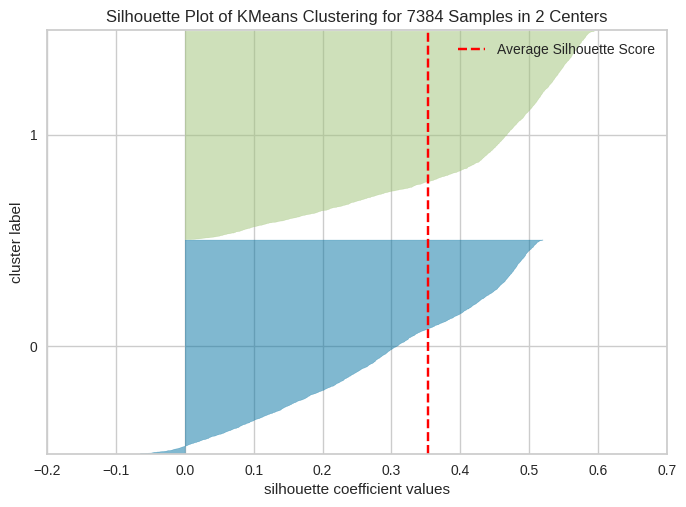

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7384 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
# Visualizer usando os dados não escalonados
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

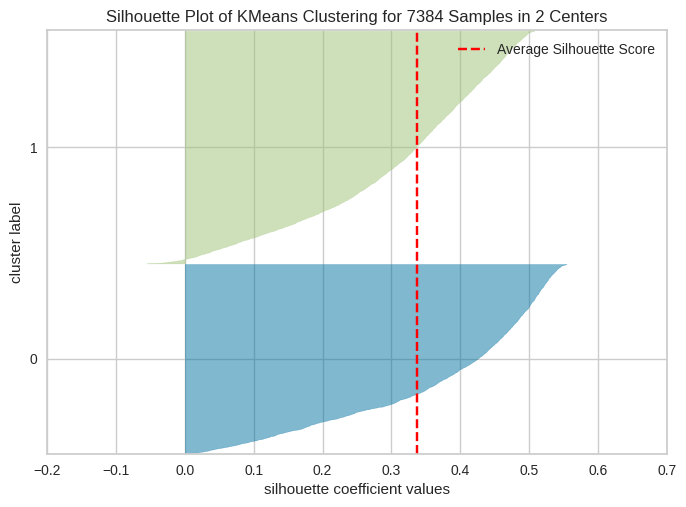

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7384 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [124]:
# Visualizer usando os dados escalonados usando o Standard Scaler
visualizer = SilhouetteVisualizer(kmeansScaled, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

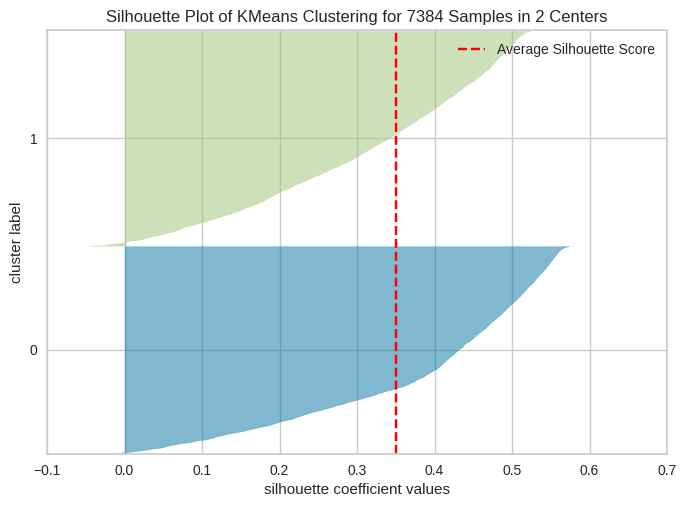

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7384 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [125]:
# Visualizer usando os dados escalonados usando o Normalizer
visualizer = SilhouetteVisualizer(kmeansNorm, colors='yellowbrick')
visualizer.fit(X_norm)
visualizer.show()

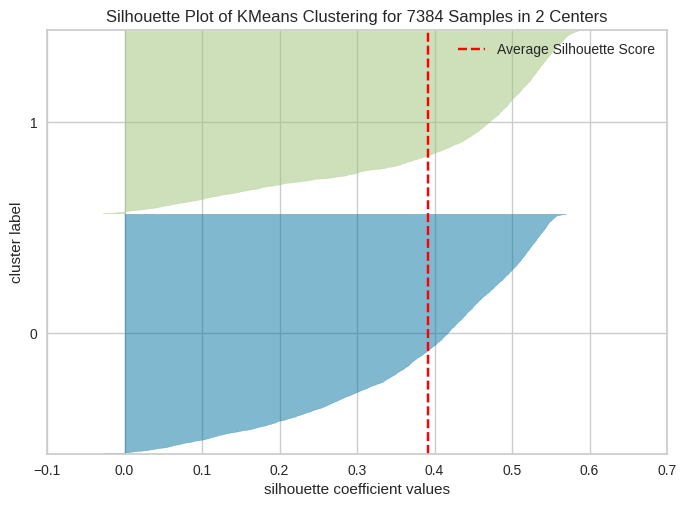

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7384 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [126]:
# Visualizer usando os dados escalonados usando o MinMaxScaler
visualizer = SilhouetteVisualizer(kmeansMinMax, colors='yellowbrick')
visualizer.fit(X_min_max)
visualizer.show()

Checando os scores finais de cada um dos modelos de K-Means

In [127]:
kmeans_silhouette = silhouette_score(X, kmeans_lables)
kmeansScaled_silhouette = silhouette_score(X_scaled, kmeans_lablesScaled)
kmeansNorm_silhouette = silhouette_score(X_norm, kmeans_lablesNorm)
kmeansMinMax_silhouette = silhouette_score(X_min_max, kmeans_lablesMinMax)

print(f'{kmeans_silhouette:.4f}')
print(f'{kmeansScaled_silhouette:.4f}')
print(f'{kmeansNorm_silhouette:.4f}')
print(f'{kmeansMinMax_silhouette:.4f}')

0.3524
0.3378
0.3500
0.3921


O modelo utilizando os dados escalonados com o MinMaxScaler teve o maior score de silhueta, irei utiliza-lo para comparações futuras com modelos de outros métodos de clusterização.

# DBScan

Utilizadndo o KNN e K-dist para encontrar o melhor valor de eps para o modelo

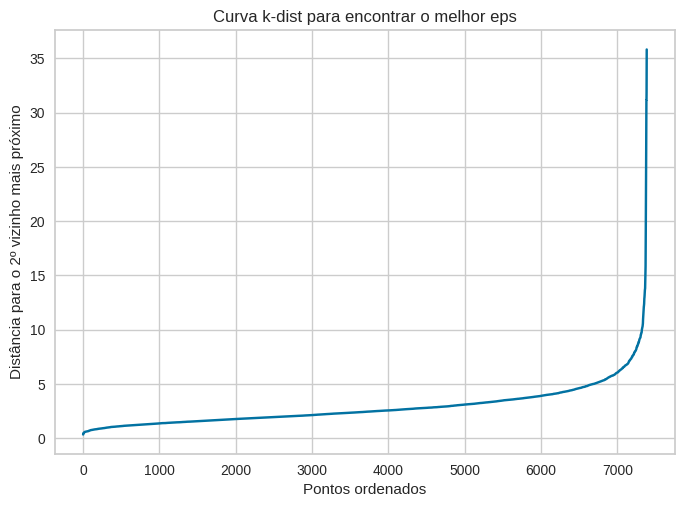

In [128]:
from sklearn.neighbors import NearestNeighbors

kn = 2 # Cheguei nesse valor fazendo testes e foi o melhor.

# Calcular as distâncias para o k-vizinho mais próximo
nbrs = NearestNeighbors(n_neighbors=kn).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances[:, kn-1])

# Plotar a curva k-dist
plt.plot(distances)
plt.xlabel('Pontos ordenados')
plt.ylabel('Distância para o {}º vizinho mais próximo'.format(kn))
plt.title('Curva k-dist para encontrar o melhor eps')
plt.show()

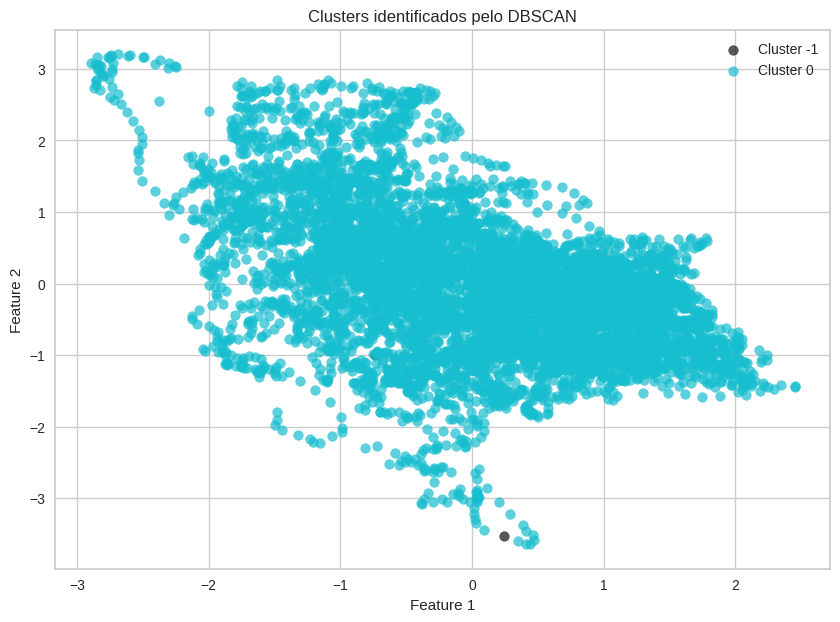

0.7208940323812922


In [129]:
# eps = 7 seguindo o gráfico de k-dist e min_samples = 11 por ser a dimensionalidade do DF
dbscan = DBSCAN(eps=7, min_samples=11)
clusters = dbscan.fit_predict(X_scaled)

unique_labels = np.unique(clusters)
colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 7))
for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'k'
    plt.scatter(X_scaled[clusters == label, 0], X_scaled[clusters == label, 1], color=color, label=f'Cluster {label}', alpha= 0.7)
plt.title('Clusters identificados pelo DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
dbacan_silhouette = silhouette_score(X_scaled, clusters)
print(dbacan_silhouette)

# Clusterização Hierárquica

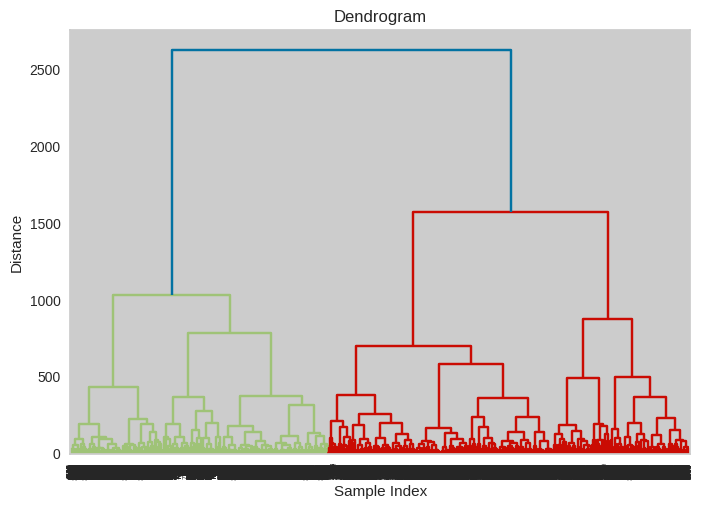

In [130]:
# Dendrograma para encontrar um bom número de clusters
linked = linkage(X, metric= 'euclidean', method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance');

In [131]:
#Criando a função para mostrar onde vai ficar o corte no dendrograma
def plot_dendrogram_with_cut(linked, cut_height):
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title('Dendrogram with Cut')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.axhline(y=cut_height, color='r', linestyle='--')
    plt.show()

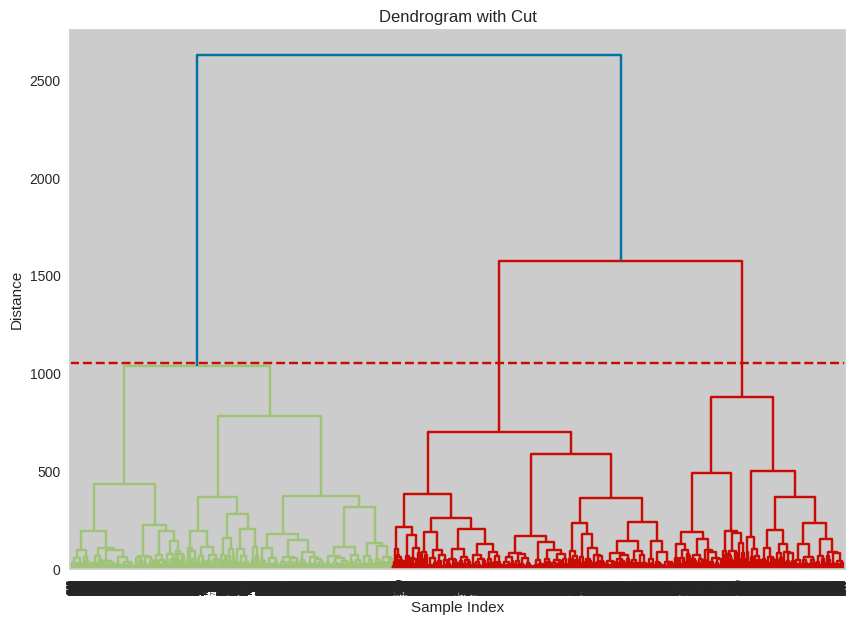

In [132]:
plot_dendrogram_with_cut(linked, 1050)

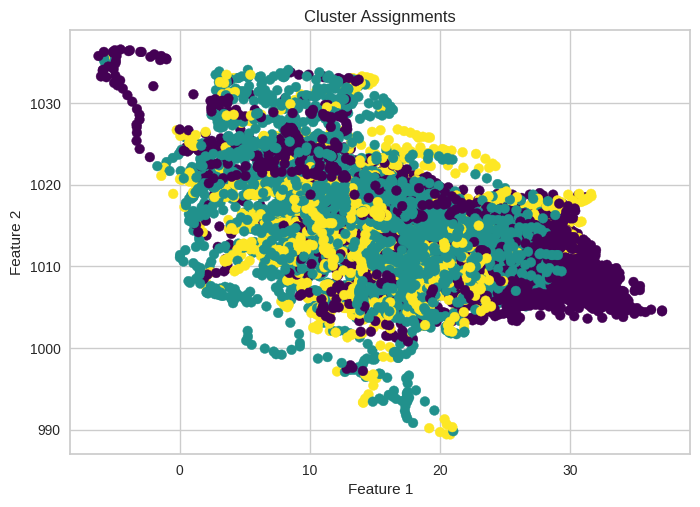

In [133]:
#Corte na árvore para pré-vizualizar o cluster
cluster_assignments = fcluster(linked, t=1050, criterion='distance')
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Assignments')
plt.show()

In [134]:
# Criação da classe para fazer o fit_predict no score
class AgglomerativeClusteringWrapper(AgglomerativeClustering):
    def predict(self,X):
      return self.labels_.astype(int)

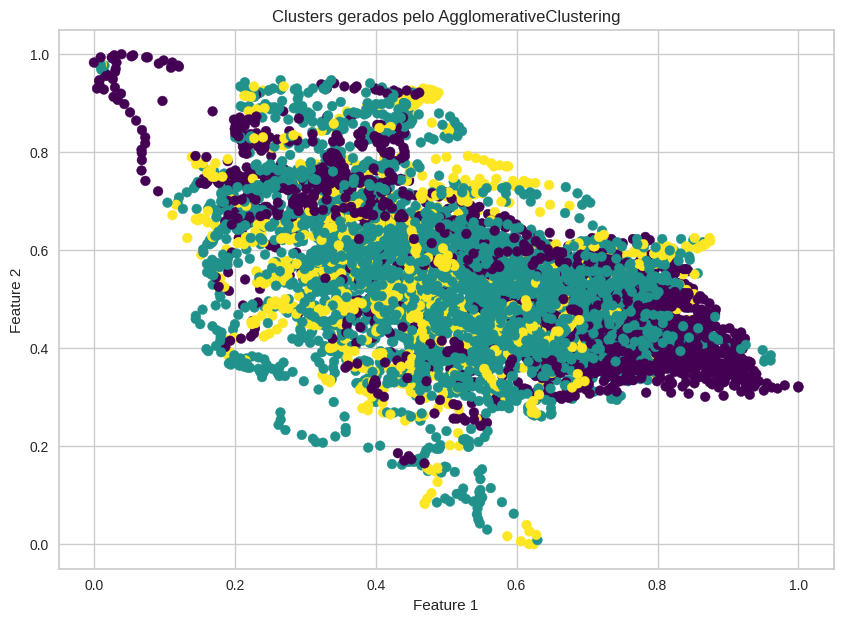

0.3414


In [135]:
# n_clusters = 3 se baseando no corte do dendrograma
hierarchical = AgglomerativeClusteringWrapper(n_clusters = 3, linkage = 'ward')
hierarchical_labels = hierarchical.fit_predict(X_min_max)

plt.figure(figsize=(10, 7))
plt.scatter(X_min_max[:, 0], X_min_max[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Clusters gerados pelo AgglomerativeClustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
hierarchical_silhouette = silhouette_score(X_min_max, hierarchical_labels )
print(f'{hierarchical_silhouette:.4f}')

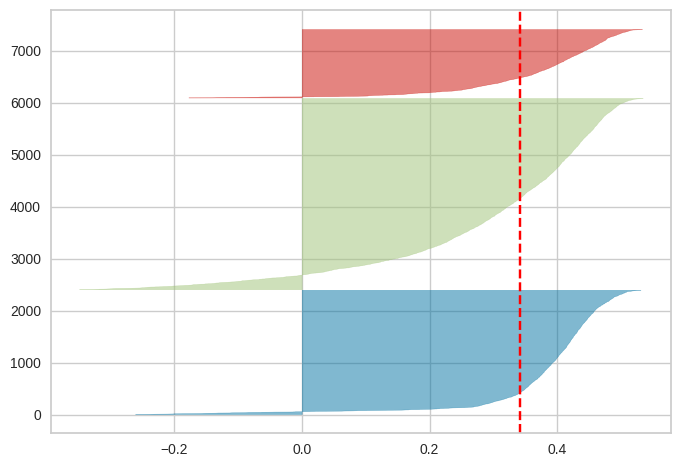

In [136]:
# Usando o visualizer para ver o gráfico de silhueta
visualizer = SilhouetteVisualizer(hierarchical, colors='yellowbrick')
visualizer.fit(X_min_max);

# Demonstração dos melhores modelos e dos diferentes scores

O score de silhueta do K-means foi: 0.3921
O score de silhueta do DBScan foi: 0.7209
O score de silhueta de Clusterização Hierárquica foi: 0.3414


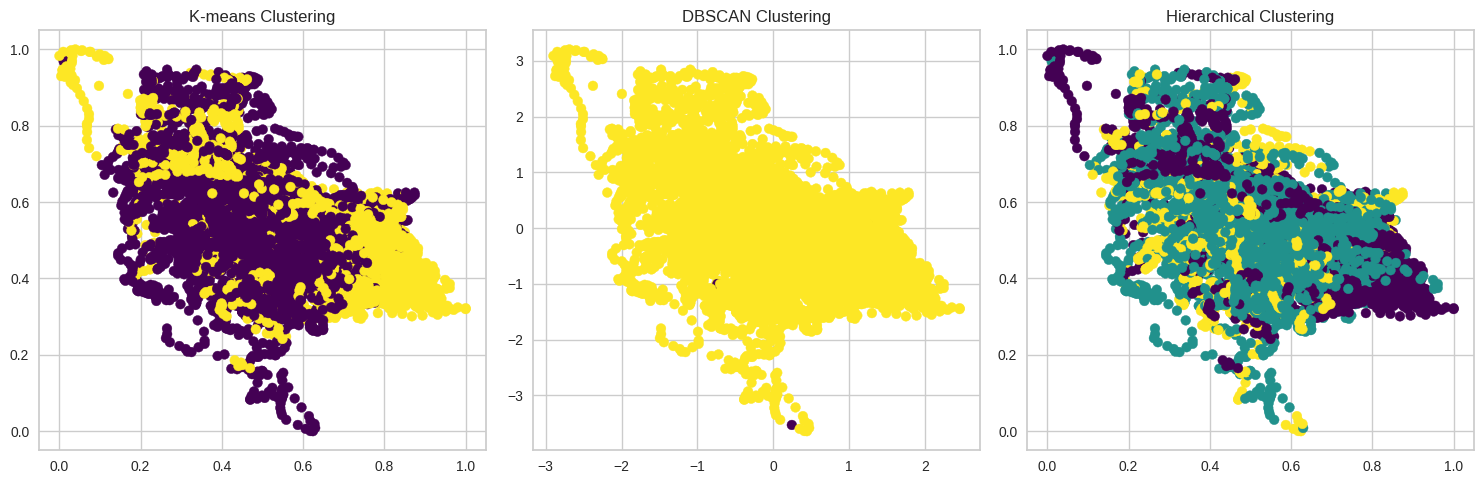

In [137]:
plt.figure(figsize=(15, 5))

#Plot do melhor modelo de Kmeans
plt.subplot(131)
plt.scatter(X_min_max[:, 0], X_min_max[:, 1], c=kmeans_lablesMinMax, cmap='viridis')
plt.title('K-means Clustering')
print('O score de silhueta do K-means foi: ' + "{:.4f}".format(kmeansMinMax_silhouette))

#Plot do melhor modelo de DBscan
plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
print('O score de silhueta do DBScan foi: ' + "{:.4f}".format(dbacan_silhouette))

#Plot do melhor modelo de Clusterização Hierárquica
plt.subplot(133)
plt.scatter(X_min_max[:, 0], X_min_max[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
print('O score de silhueta de Clusterização Hierárquica foi: ' + "{:.4f}".format(hierarchical_silhouette))

plt.tight_layout()

In [138]:
# Usando o Davies-Bouldin Score
# "The minimum score is zero, with lower values indicating better clustering."

print(f'O Davies-Bouldin score do melhor K-Means foi: {davies_bouldin_score(X_min_max, kmeans_lablesMinMax):.4f}')
print(f'O Davies-Bouldin score do melhor DBScan foi: {davies_bouldin_score(X_scaled, clusters):.4f}')
print(f'O Davies-Bouldin score da melhor Clusterização Hierárquica foi: {davies_bouldin_score(X_min_max, hierarchical_labels):.4f}')

O Davies-Bouldin score do melhor K-Means foi: 0.9929
O Davies-Bouldin score do melhor DBScan foi: 0.5036
O Davies-Bouldin score da melhor Clusterização Hierárquica foi: 1.0704


In [139]:
# Usando o Calinski-Harabasz Score
# "...can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.""

print(f'O Calinski-Harabasz score do melhor K-Means foi: {calinski_harabasz_score(X_min_max, kmeans_lablesMinMax):.4f}')
print(f'O Calinski-Harabasz score do melhor DBScan foi: {calinski_harabasz_score(X_scaled, clusters):.4f}')
print(f'O Calinski-Harabasz score da melhor Clusterização Hierárquica foi: {calinski_harabasz_score(X_min_max, hierarchical_labels):.4f}')

O Calinski-Harabasz score do melhor K-Means foi: 6400.0190
O Calinski-Harabasz score do melhor DBScan foi: 77.9758
O Calinski-Harabasz score da melhor Clusterização Hierárquica foi: 5241.8565


# Visualização dos resultados da clusterização em 2D

Usando o PCA

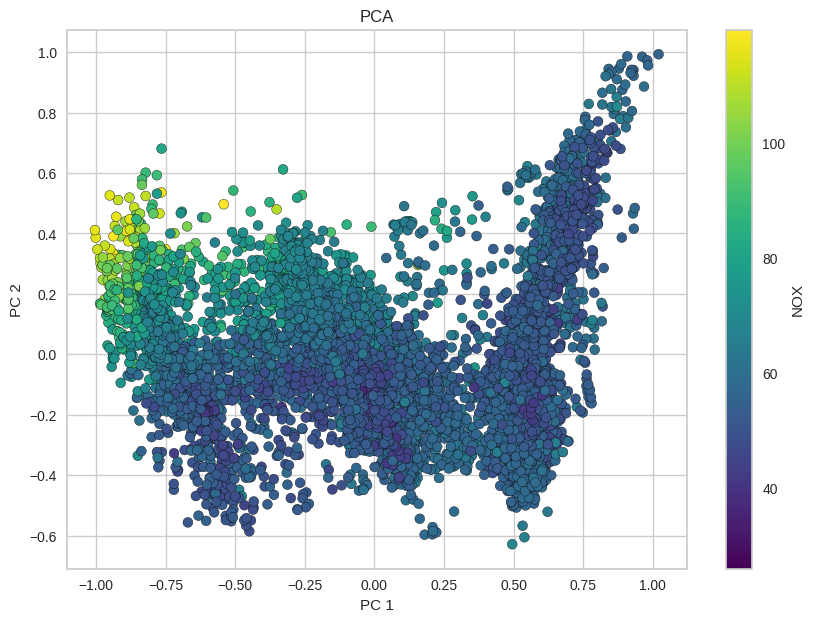

[0.64385702 0.16527424] 0.809131260114986


In [140]:
# Atribuição somente para uma melhor visualização e análise do gráfico
y = df['NOX']

pca_min1 = PCA(n_components=2)
X_pca_min_max = pca_min1.fit_transform(X_min_max)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca_min_max[:, 0], X_pca_min_max[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.colorbar(scatter, label='NOX')
plt.show()
print(pca_min1.explained_variance_ratio_, sum(pca_min1.explained_variance_ratio_))

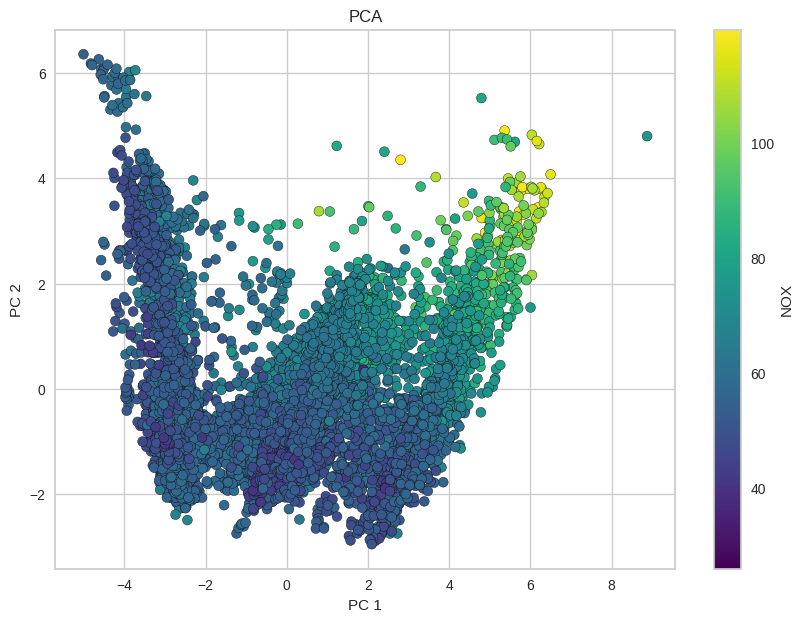

[0.54344933 0.19594702] 0.7393963479840603


In [141]:
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
scatter_scaled = plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.colorbar(scatter_scaled, label = 'NOX')
plt.show()
print(pca_scaled.explained_variance_ratio_, sum(pca_scaled.explained_variance_ratio_))

Usando agora o t-SNE

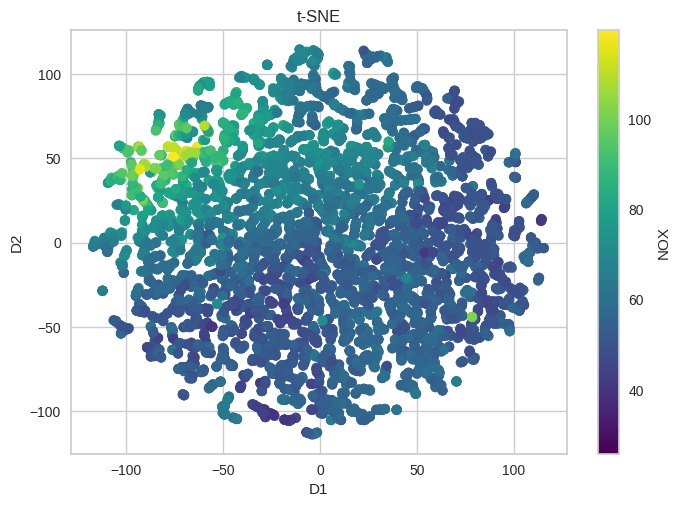

In [142]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
X_tsne = tsne.fit_transform(X_min_max)
tsne_scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('D1')
plt.ylabel('D2')
plt.colorbar(tsne_scatter, label = 'NOX')

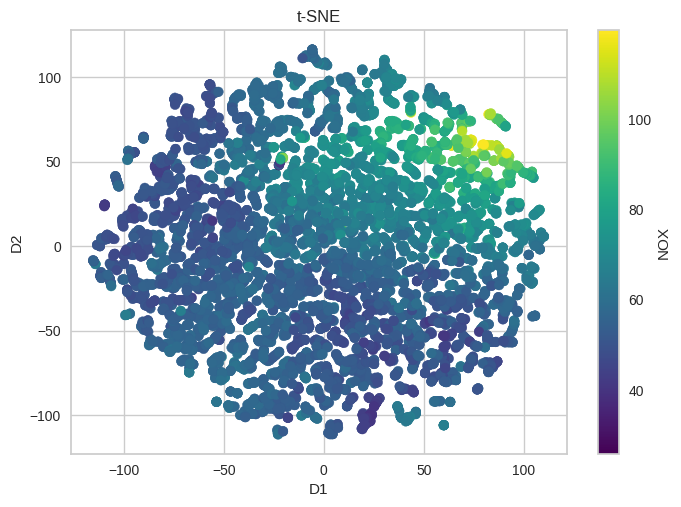

In [143]:
X_tsne_scaled = tsne.fit_transform(X_scaled)
tsne_scatter_scaled = plt.scatter(X_tsne_scaled[:, 0], X_tsne_scaled[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('D1')
plt.ylabel('D2')
plt.colorbar(tsne_scatter_scaled, label = 'NOX')